In [3]:
%matplotlib notebook


# 3D animation


An animated plot in 3D.



<IPython.core.display.Javascript object>


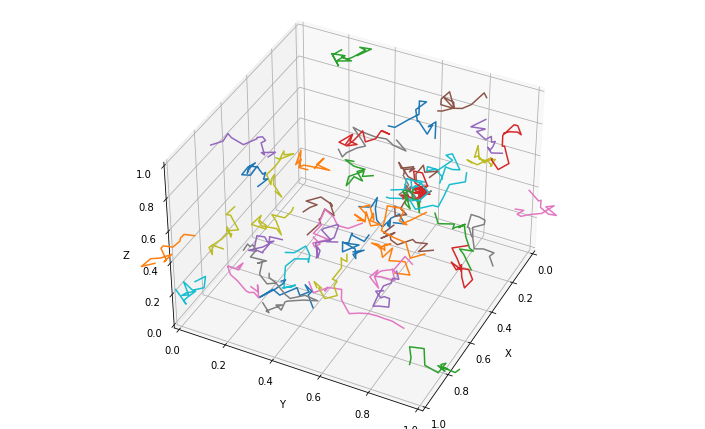

/tmp/ipykernel_811692/143626163.py:39: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)
/home/phil/.pyenv/versions/3.10.0rc1/envs/insa/lib/python3.10/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

fonction à tracer : 
    a et b 2 constantes
    x = a * cos(omega * t)
    y = a * sin(omega * t)
    z = b * t

<IPython.core.display.Javascript object>


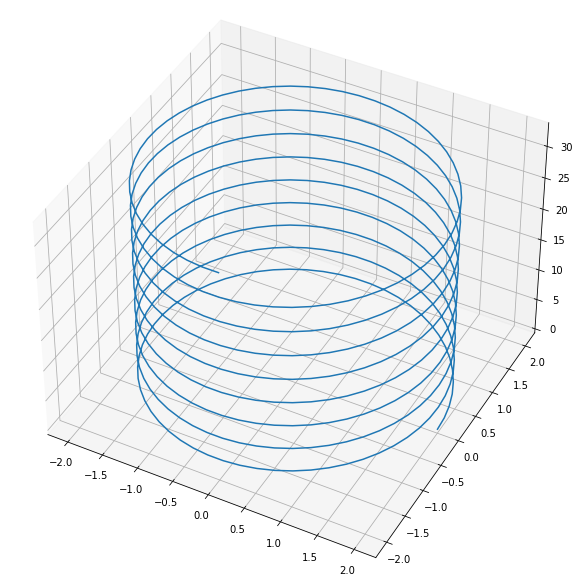

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
#np.random.seed(19680801)

a = 2
b = 3
omega = 5

t = np.linspace(0, 11, 500)

x = a * np.cos(omega * t)
y = a * np.sin(omega * t)
z = b * t

# Attaching 3D axis to the figure
fig = plt.figure(figsize=(8, 8))
ax = p3.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(x,y,z)

"""
line, = ax.plot([],[], [])
point, = ax.plot([], [], [])


def animate(k):
    i = min(k, x.size)
    line.set_data(x[:i], y[:i], z[:i])
    point.set_data(x[i], y[i], z[i])
    return line, point

# Génération de l’animation, frames précise les arguments numérique reçus par func (ici animate),
# interval est la durée d’une image en ms, blit gère la mise à jour
ani = animation.FuncAnimation(fig=fig, func=animate, frames=range(t.size),
                                   interval=50, blit=False)
plt.show()
""";